<a href="https://colab.research.google.com/github/DajeanArcila/DajeanArcila/blob/main/TestADFEstacionalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nova seção

In [50]:
#codigo para pronostico del dolar sin volumen de ventas

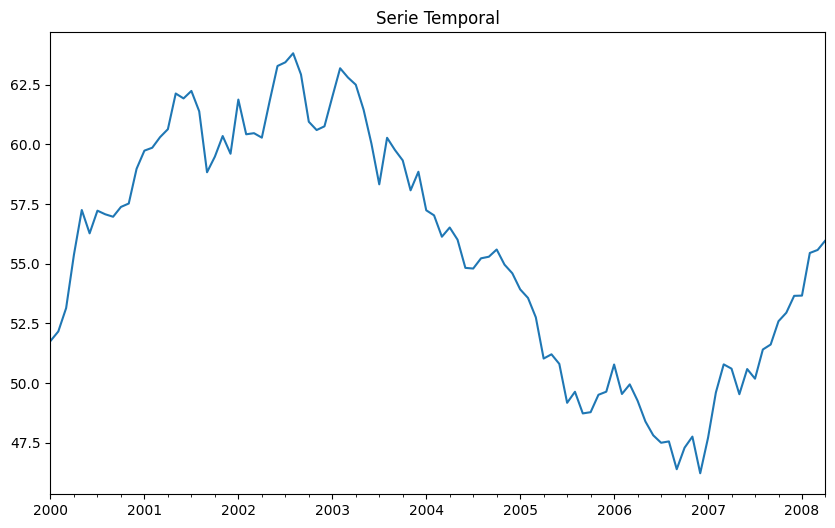

ADF Statistic: -1.132038462509789
p-value: 0.7021277385898388
Critical Values:
	1%: -3.498
	5%: -2.891
	10%: -2.583
No rechazar H0: La serie temporal no es estacionaria


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Crear datos de ejemplo (serie no estacionaria)
np.random.seed(0)
data = np.random.randn(100).cumsum() + 50
date_range = pd.date_range(start='1/1/2000', periods=len(data), freq='M')
time_series = pd.Series(data, index=date_range)

# Graficar la serie temporal
time_series.plot(title='Serie Temporal', figsize=(10, 6))
plt.show()

# Aplicar el test ADF
result = adfuller(time_series)

# Mostrar los resultados del test ADF
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretación del resultado
if result[1] <= 0.05:
    print("Rechazar H0: La serie temporal es estacionaria")
else:
    print("No rechazar H0: La serie temporal no es estacionaria")


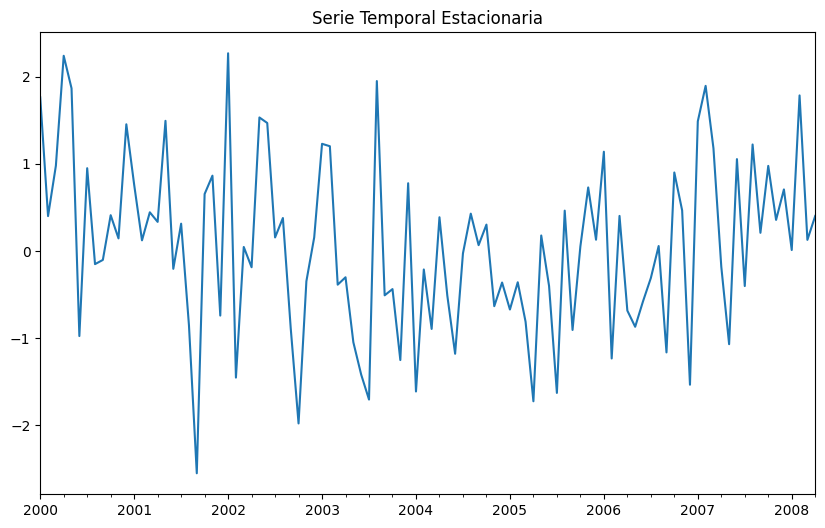

ADF Statistic: -9.298574759765579
p-value: 1.1285451053950947e-15
Critical Values:
	1%: -3.498
	5%: -2.891
	10%: -2.583
Rechazar H0: La serie temporal es estacionaria


In [52]:
# Crear datos de ejemplo (serie estacionaria)
np.random.seed(0)
data_stationary = np.random.randn(100)
date_range_stationary = pd.date_range(start='1/1/2000', periods=len(data_stationary), freq='M')
time_series_stationary = pd.Series(data_stationary, index=date_range_stationary)

# Graficar la serie temporal
time_series_stationary.plot(title='Serie Temporal Estacionaria', figsize=(10, 6))
plt.show()

# Aplicar el test ADF
result_stationary = adfuller(time_series_stationary)

# Mostrar los resultados del test ADF
print('ADF Statistic:', result_stationary[0])
print('p-value:', result_stationary[1])
print('Critical Values:')
for key, value in result_stationary[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretación del resultado
if result_stationary[1] <= 0.05:
    print("Rechazar H0: La serie temporal es estacionaria")
else:
    print("No rechazar H0: La serie temporal no es estacionaria")


# Nova seção

In [70]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Cargar los datos desde un archivo CSV
# Asegúrate de cambiar "tus_datos.csv" por la ruta real de tu archivo
dataset = pd.read_excel("/content/BaseDeDatosLista_1planilla.xlsx")

# Mostrar las primeras filas del dataset para verificar
dataset.head()


,Data,Último,Abertura,Máxima,Mínima,Vol/,Var%,DATA,RESERVAS
0,2024-04-30,5.1934,5.1190,5.1975,5.1133,95.19,0.0146,2024-04-30,351.599
1,2024-04-29,5.1189,5.1170,5.1227,5.1020,95.19,0.0007,2024-04-29,351.599
2,2024-04-26,5.1151,5.1615,5.1673,5.1085,95.19,-0.0087,2024-04-26,351.599
3,2024-04-25,5.1602,5.1472,5.1935,5.1099,95.19,0.0028,2024-04-25,351.599
4,2024-04-24,5.1457,5.1263,5.1720,5.1238,95.19,0.0038,2024-04-24,351.599


In [71]:
# Eliminar columnas no deseadas
dataset = dataset.drop(columns=['Var%', 'DATA'])  # Reemplaza 'Column7' y 'Column6' por los nombres reales

In [72]:
# Asegurarse de que la columna de fecha esté en el formato correcto
dataset['Data'] = pd.to_datetime(dataset['Data'])
dataset.set_index('Data', inplace=True)

In [73]:
# Calcular la columna 'Mean' como el promedio de los precios alto y bajo
dataset['Mean'] = (dataset['Máxima'] + dataset['Mínima']) / 2
# Diferenciación



In [74]:
# Diferenciación
dataset['Mean_diff'] = dataset['Mean'].diff()

In [75]:
# Mostrar las primeras filas para verificar el cálculo de 'Mean'
print(dataset.head())



            Último  Abertura  Máxima  Mínima   Vol/  RESERVAS     Mean  \
Data                                                                     
2024-04-30  5.1934    5.1190  5.1975  5.1133  95.19   351.599  5.15540   
2024-04-29  5.1189    5.1170  5.1227  5.1020  95.19   351.599  5.11235   
2024-04-26  5.1151    5.1615  5.1673  5.1085  95.19   351.599  5.13790   
2024-04-25  5.1602    5.1472  5.1935  5.1099  95.19   351.599  5.15170   
2024-04-24  5.1457    5.1263  5.1720  5.1238  95.19   351.599  5.14790   

            Mean_diff  
Data                   
2024-04-30        NaN  
2024-04-29   -0.04305  
2024-04-26    0.02555  
2024-04-25    0.01380  
2024-04-24   -0.00380  


In [76]:
# Selecciona la columna que contiene la serie temporal que quieres analizar
# En este caso, usaremos la columna 'Mean'
time_series = dataset['Mean']
# Eliminar NaNs resultantes de la diferenciación
dataset.dropna(inplace=True)

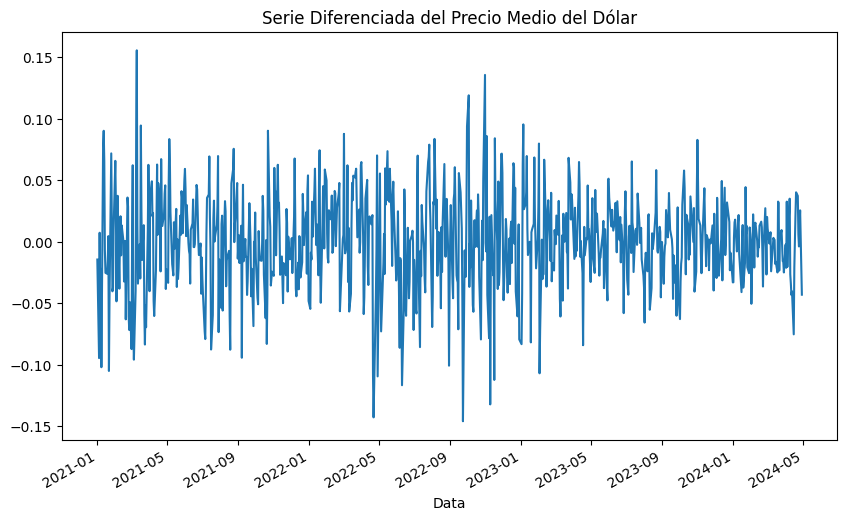

In [77]:
# Graficar la serie diferenciada
dataset['Mean_diff'].plot(title='Serie Diferenciada del Precio Medio del Dólar', figsize=(10, 6))
plt.show()

In [78]:
# Aplicar el test ADF a la serie diferenciada
result_diff = adfuller(dataset['Mean_diff'])

In [79]:
# Mostrar los resultados del test ADF
print('ADF Statistic (diferenciada):', result_diff[0])
print('p-value (diferenciada):', result_diff[1])
print('Critical Values:')
for key, value in result_diff[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretación del resultado
if result_diff[1] <= 0.05:
    print("Rechazar H0: La serie temporal diferenciada es estacionaria")
else:
    print("No rechazar H0: La serie temporal diferenciada no es estacionaria")

ADF Statistic (diferenciada): -20.295263373895338
p-value (diferenciada): 0.0
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569
Rechazar H0: La serie temporal diferenciada es estacionaria


In [ ]:
#en este codigo aplicamos la diferenciacion porque es mas simple


###recordando que podemos hacer una serie temporal estacional con los siguientes metodos

Diferenciación:

Transformaciones de Potencia o Logarítmicas:

Descomposición Estacional:

####Aplicación Práctica
Aquí hay un ejemplo práctico de cómo aplicar la diferenciación y la transformación logarítmica a una serie temporal, y cómo podrías proceder con la descomposición estacional:

In [ ]:
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

# Supongamos que 'dataset' es tu DataFrame con la columna 'Mean'
dataset = pd.read_csv("tus_datos.csv")
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.set_index('Date', inplace=True)
dataset['Mean'] = (dataset['High'] + dataset['Low']) / 2

# Diferenciación
dataset['Mean_diff'] = dataset['Mean'].diff()
dataset.dropna(inplace=True)

# Test de ADF en serie diferenciada
result_diff = adfuller(dataset['Mean_diff'])
print('ADF Statistic (diferenciada):', result_diff[0])
print('p-value (diferenciada):', result_diff[1])

# Transformación logarítmica seguida de diferenciación
dataset['Mean_log'] = np.log(dataset['Mean'])
dataset['Mean_log_diff'] = dataset['Mean_log'].diff()
dataset.dropna(inplace=True)

# Test de ADF en serie logarítmica diferenciada
result_log_diff = adfuller(dataset['Mean_log_diff'])
print('ADF Statistic (logarítmica diferenciada):', result_log_diff[0])
print('p-value (logarítmica diferenciada):', result_log_diff[1])

# Descomposición estacional
decomposition = sm.tsa.seasonal_decompose(dataset['Mean'], model='additive', period=365)
decomposition.plot()
plt.show()

# Test de ADF en los residuos de la descomposición
residual = decomposition.resid.dropna()
result_resid = adfuller(residual)
print('ADF Statistic (residual):', result_resid[0])
print('p-value (residual):', result_resid[1])
'''

#transformacion logaritmica
'''
# Aplicar una transformación logarítmica
dataset['Mean_log'] = np.log(dataset['Mean'])

# Diferenciación de la serie logarítmica
dataset['Mean_log_diff'] = dataset['Mean_log'].diff()

# Eliminar NaNs resultantes de la diferenciación
dataset.dropna(inplace=True)

# Graficar la serie logarítmica diferenciada
dataset['Mean_log_diff'].plot(title='Serie Logarítmica Diferenciada del Precio Medio del Dólar', figsize=(10, 6))
plt.show()

# Aplicar el test ADF a la serie logarítmica diferenciada
result_log_diff = adfuller(dataset['Mean_log_diff'])

# Mostrar los resultados del test ADF
print('ADF Statistic (logarítmica diferenciada):', result_log_diff[0])
print('p-value (logarítmica diferenciada):', result_log_diff[1])
print('Critical Values:')
for key, value in result_log_diff[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretación del resultado
if result_log_diff[1] <= 0.05:
    print("Rechazar H0: La serie temporal logarítmica diferenciada es estacionaria")
else:
    print("No rechazar H0: La serie temporal logarítmica diferenciada no es estacionaria")

'''
#Descomposición Estacional
#Si sospechas que hay una componente estacional que no es capturada simplemente con diferenciación, puedes usar la descomposición estacional:

'''
import statsmodels.api as sm

# Descomposición estacional
decomposition = sm.tsa.seasonal_decompose(dataset['Mean'], model='additive', period=365)
decomposition.plot()
plt.show()

# Trabajar con los componentes residuales que deberían ser estacionarios
residual = decomposition.resid.dropna()

# Aplicar el test ADF a los residuales
result_resid = adfuller(residual)

# Mostrar los resultados del test ADF
print('ADF Statistic (residual):', result_resid[0])
print('p-value (residual):', result_resid[1])
print('Critical Values:')
for key, value in result_resid[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretación del resultado
if result_resid[1] <= 0.05:
    print("Rechazar H0: La componente residual es estacionaria")
else:
    print("No rechazar H0: La componente residual no es estacionaria")


'''

#Siguientes Pasos
#Aplicar Diferenciación: Si una primera diferenciación no es suficiente, intenta con una segunda diferenciación (dataset['Mean_diff2'] = dataset['Mean_diff'].diff()).
#Modelos: Una vez que la serie sea estacionaria, puedes aplicar modelos como ARIMA o SARIMAX.